# PROBLEM STATEMENT

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

BY - ADVAITH RADHAKRISHNAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv(r"C:\Users\Advaith R\Downloads\housingdata.csv")
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [326]:
#1. Performing EDA to understand the data

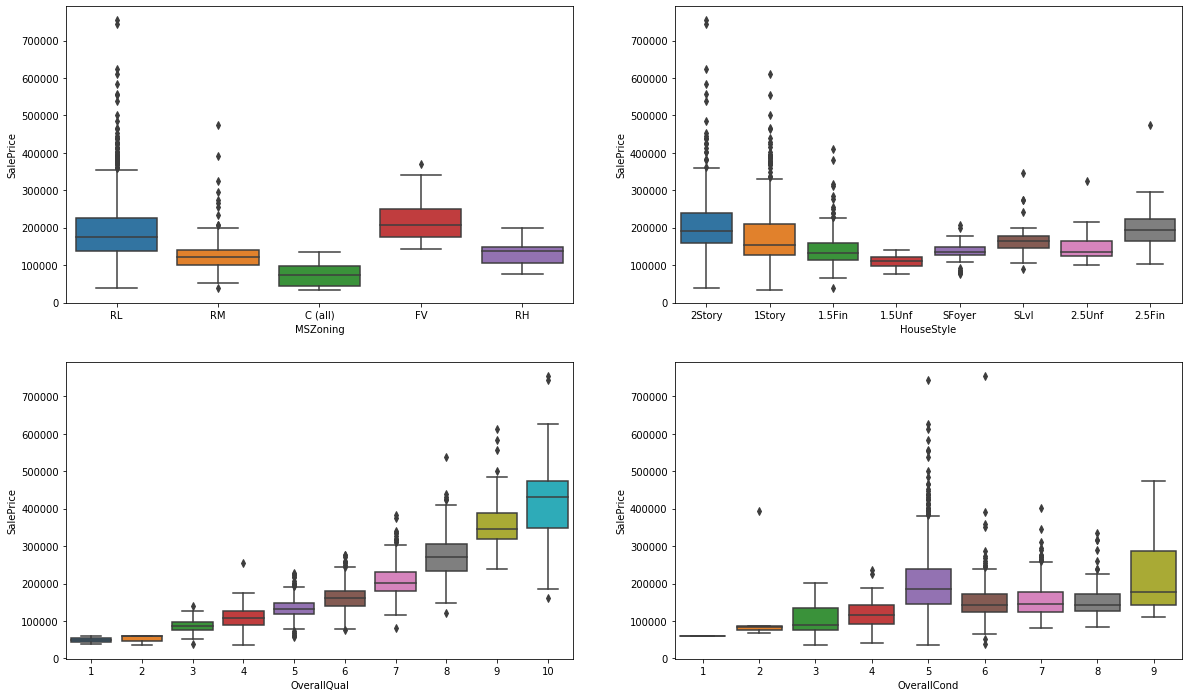

In [327]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing)
plt.subplot(2,2,3)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.subplot(2,2,4)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing)
plt.show()

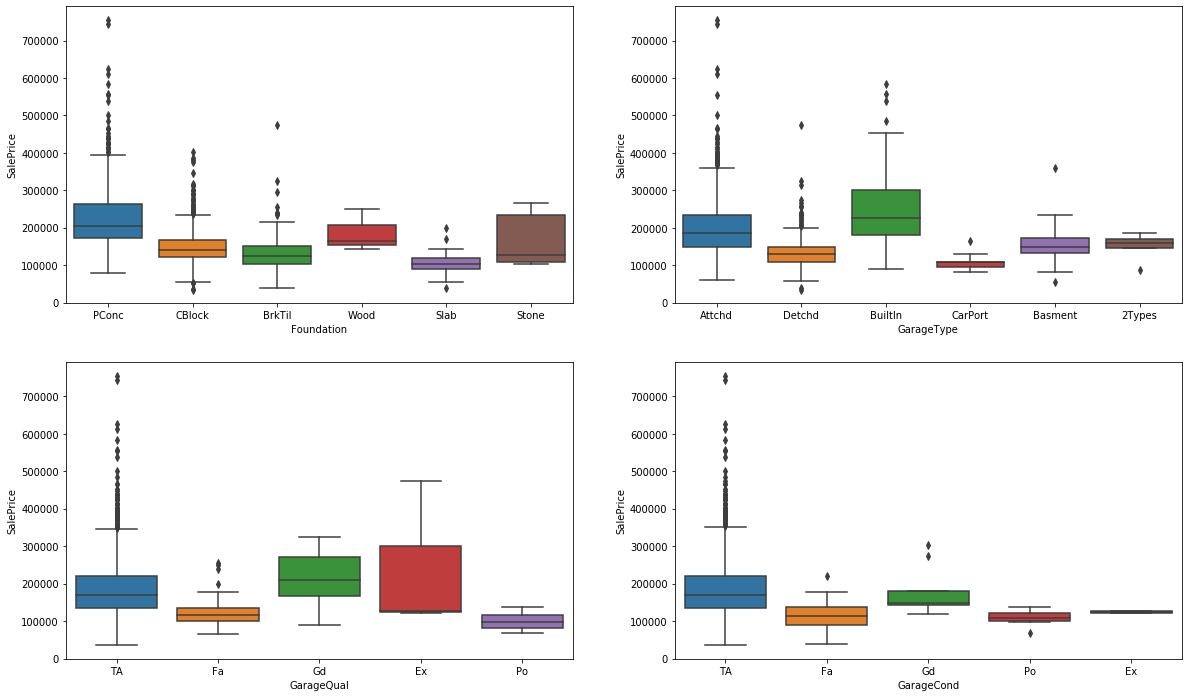

In [125]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing)
plt.subplot(2,2,3)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing)
plt.subplot(2,2,4)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing)
plt.show()

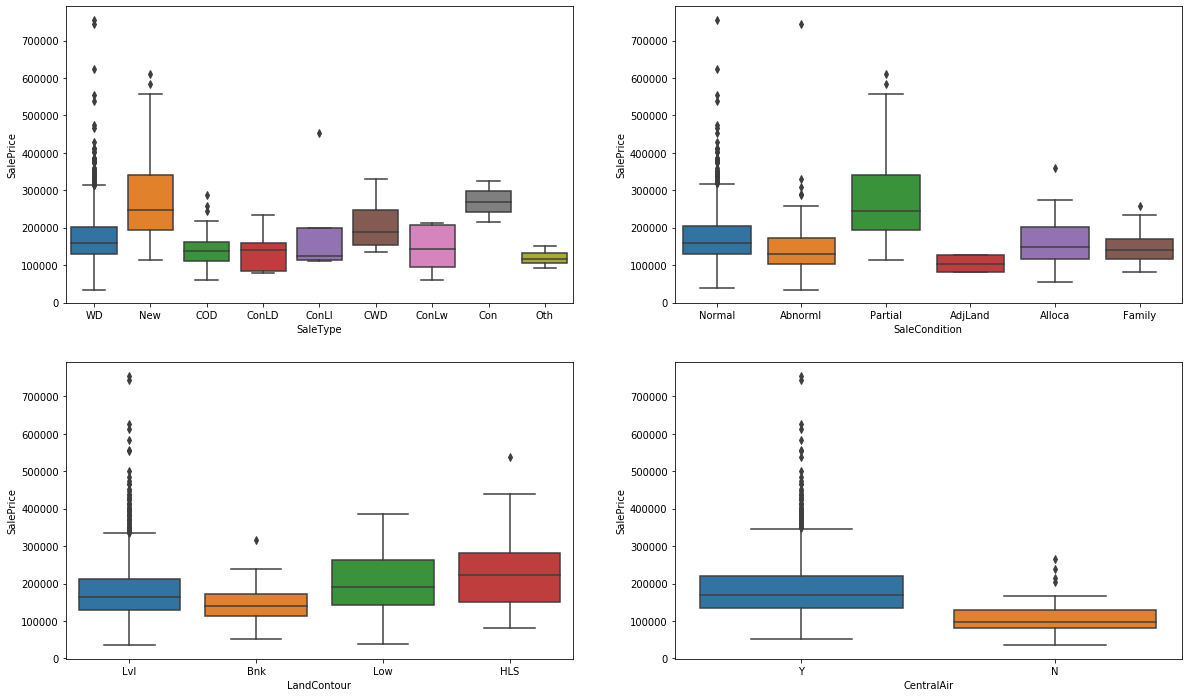

In [126]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing)
plt.subplot(2,2,3)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing)
plt.subplot(2,2,4)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.show()

In [5]:

pd.set_option('display.max_rows', 500)

In [6]:
# Column-wise null percentages
round(100*(housing.isnull().sum()/len(housing.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
#As we can see, many columns contain null values, which will hamper our model
#Hence, let us drop columns that is having null percentage greater than 45%
housing = housing.drop(['Alley',
                            'FireplaceQu',
                            'PoolQC',
                            'Fence',                       
                            'MiscFeature'],
                      axis=1)

In [8]:
round(100*(housing.isnull().sum()/len(housing.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [9]:
#There are some variables such as BaseQual that can be converted into numerical values rather than strings so that too many dummy variables 
#doesnt have to be created for each of them

In [10]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

#1.BaseQual 
housing['BsmtQual']= label_encoder.fit_transform(housing['BsmtQual'].astype(str)) 
  
housing['BsmtQual'].unique() 

array([2, 3, 0, 4, 1], dtype=int64)

In [11]:
housing['BsmtQual'].value_counts(normalize=True) * 100

3    44.452055
2    42.328767
0     8.287671
4     2.534247
1     2.397260
Name: BsmtQual, dtype: float64

In [12]:
#2.BsmtCond
housing['BsmtCond']= label_encoder.fit_transform(housing['BsmtCond'].astype(str)) 
  
housing['BsmtCond'].unique() 
housing['BsmtCond'].value_counts(normalize=True) * 100

3    89.794521
1     4.452055
0     3.082192
4     2.534247
2     0.136986
Name: BsmtCond, dtype: float64

In [13]:
#3.BsmtExposure
housing['BsmtExposure']= label_encoder.fit_transform(housing['BsmtExposure'].astype(str)) 
  
housing['BsmtExposure'].unique() 
housing['BsmtExposure'].value_counts(normalize=True) * 100

3    65.273973
0    15.136986
1     9.178082
2     7.808219
4     2.602740
Name: BsmtExposure, dtype: float64

In [14]:
#4.BsmtFinType1
housing['BsmtFinType1']= label_encoder.fit_transform(housing['BsmtFinType1'].astype(str)) 
  
housing['BsmtFinType1'].unique() 
housing['BsmtFinType1'].value_counts(normalize=True) * 100

5    29.452055
2    28.630137
0    15.068493
1    10.136986
4     9.109589
3     5.068493
6     2.534247
Name: BsmtFinType1, dtype: float64

In [15]:
#5.BsmtFinType2
housing['BsmtFinType2']= label_encoder.fit_transform(housing['BsmtFinType2'].astype(str)) 
  
housing['BsmtFinType2'].unique() 
housing['BsmtFinType2'].value_counts(normalize=True) * 100

5    86.027397
4     3.698630
3     3.150685
6     2.602740
1     2.260274
0     1.301370
2     0.958904
Name: BsmtFinType2, dtype: float64

In [16]:
#6.HeatingQC
housing['HeatingQC']= label_encoder.fit_transform(housing['HeatingQC'].astype(str)) 
  
housing['HeatingQC'].unique() 
housing['HeatingQC'].value_counts(normalize=True) * 100

0    50.753425
4    29.315068
2    16.506849
1     3.356164
3     0.068493
Name: HeatingQC, dtype: float64

In [17]:
#7.CentralAir
housing['CentralAir']= label_encoder.fit_transform(housing['CentralAir'].astype(str)) 
  
housing['CentralAir'].unique() 
housing['CentralAir'].value_counts(normalize=True) * 100

1    93.493151
0     6.506849
Name: CentralAir, dtype: float64

In [18]:
#8.KitchenQual
housing['KitchenQual']= label_encoder.fit_transform(housing['KitchenQual'].astype(str)) 
   
housing['KitchenQual'].value_counts(normalize=True) * 100

3    50.342466
2    40.136986
0     6.849315
1     2.671233
Name: KitchenQual, dtype: float64

In [19]:
#9.GarageQual
housing['GarageQual']= label_encoder.fit_transform(housing['GarageQual'].astype(str)) 
   
housing['GarageQual'].value_counts(normalize=True) * 100

4    89.794521
5     5.547945
1     3.287671
2     0.958904
3     0.205479
0     0.205479
Name: GarageQual, dtype: float64

In [20]:
#Now lets check if there are any highly skewed columns and then drop it   <80
housing['MSZoning'].value_counts(normalize=True) * 100                 

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [21]:
housing['RoofStyle'].value_counts(normalize=True) * 100      #<80

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64

In [22]:
housing['SaleCondition'].value_counts(normalize=True) * 100

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64

In [23]:
#Dropping columns having highly skewwed data
housing = housing.drop(['Street','LandContour',
                        'Utilities','LandSlope',                       
                        'Condition1','Condition2',
                        'BldgType','RoofMatl',
                        'ExterCond','BsmtCond',
                        'BsmtFinType2','Heating',
                        'CentralAir','Electrical',
                        'BsmtHalfBath','KitchenAbvGr',
                        'Functional','GarageQual',
                        'GarageCond','PavedDrive',
                        '3SsnPorch','ScreenPorch',
                        'PoolArea','MiscVal',
                        'SaleType','SaleCondition',
                        'MSZoning','RoofStyle'
                       ],
                      axis=1)

In [24]:
housing['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

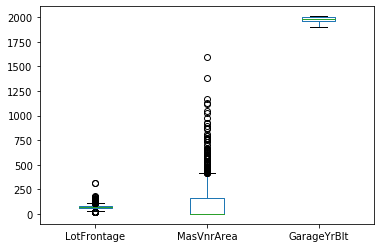

In [25]:
#Imputing missing values
#1.Continous Columns
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].plot.box()

In [26]:
#LotFrontage and MasVnrArea have outliers, hence we impute them with median
housing['LotFrontage'].fillna((housing['LotFrontage'].median()), inplace=True)

In [27]:
housing['MasVnrArea'].fillna((housing['MasVnrArea'].median()), inplace=True)

In [28]:
#GarageYrBlt we will use mean
housing['GarageYrBlt'].fillna((housing['GarageYrBlt'].mean()), inplace=True)

In [29]:
#Imputing categorical values

In [30]:
housing['MasVnrType'].value_counts(normalize=True) * 100

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

In [31]:
VntType_mode = housing['MasVnrType'].mode()[0]
housing['MasVnrType'].fillna(VntType_mode,inplace=True)

In [32]:
#2.GarageType
housing['GarageType'].value_counts(normalize=True) * 100

Attchd     63.089195
Detchd     28.063814
BuiltIn     6.381436
Basment     1.377810
CarPort     0.652647
2Types      0.435098
Name: GarageType, dtype: float64

In [33]:
GarTyp_mode = housing['GarageType'].mode()[0]
housing['GarageType'].fillna(GarTyp_mode,inplace=True)

In [34]:
#3.GarageFinish     
housing['GarageFinish'].value_counts(normalize=True) * 100

Unf    43.872371
RFn    30.601885
Fin    25.525743
Name: GarageFinish, dtype: float64

In [35]:
GarFin_mode = housing['GarageFinish'].mode()[0]
housing['GarageFinish'].fillna(GarFin_mode,inplace=True)

In [36]:
#Tranforming the target variable
housing['SalesPrice_log'] = np.log(housing['SalePrice']) 

In [37]:
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,SalesPrice_log
0,1,60,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,RFn,2,548,0,61,0,2,2008,208500,12.247694
1,2,20,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,RFn,2,460,298,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,RFn,2,608,0,42,0,9,2008,223500,12.317167
3,4,70,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Unf,3,642,0,35,272,2,2006,140000,11.849398
4,5,60,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,RFn,3,836,192,84,0,12,2008,250000,12.429216


In [38]:
housing = housing.drop('SalePrice',axis=1)

In [39]:
#Calculating age of the house according to the year built
def calculateAge(YearBuilt):
    curr_year = 2020 
    age = curr_year-YearBuilt 

    return age 

In [40]:
housing['age']=np.nan
housing['age']=housing['YearBuilt'].apply(calculateAge)

In [41]:
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalesPrice_log,age
0,1,60,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,RFn,2,548,0,61,0,2,2008,12.247694,17
1,2,20,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,RFn,2,460,298,0,0,5,2007,12.109011,44
2,3,60,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,RFn,2,608,0,42,0,9,2008,12.317167,19
3,4,70,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Unf,3,642,0,35,272,2,2006,11.849398,105
4,5,60,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,RFn,3,836,192,84,0,12,2008,12.429216,20


In [42]:
#Dropping all the year columns
housing = housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

In [43]:
#Creating dummy variables
#1.Lotshape1

#Dropping the first column
Lotshape1 = pd.get_dummies(housing['LotShape'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, Lotshape1], axis = 1)
housing.drop(['LotShape'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalesPrice_log,age,IR2,IR3,Reg
0,1,60,65.0,8450,Inside,CollgCr,2Story,7,5,VinylSd,...,548,0,61,0,2,12.247694,17,0,0,1
1,2,20,80.0,9600,FR2,Veenker,1Story,6,8,MetalSd,...,460,298,0,0,5,12.109011,44,0,0,1
2,3,60,68.0,11250,Inside,CollgCr,2Story,7,5,VinylSd,...,608,0,42,0,9,12.317167,19,0,0,0
3,4,70,60.0,9550,Corner,Crawfor,2Story,7,5,Wd Sdng,...,642,0,35,272,2,11.849398,105,0,0,0
4,5,60,84.0,14260,FR2,NoRidge,2Story,8,5,VinylSd,...,836,192,84,0,12,12.429216,20,0,0,0


In [44]:
#2.LotConfig1
#Dropping the first column
LotConfig1 = pd.get_dummies(housing['LotConfig'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, LotConfig1], axis = 1)
housing.drop(['LotConfig'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,...,MoSold,SalesPrice_log,age,IR2,IR3,Reg,CulDSac,FR2,FR3,Inside
0,1,60,65.0,8450,CollgCr,2Story,7,5,VinylSd,VinylSd,...,2,12.247694,17,0,0,1,0,0,0,1
1,2,20,80.0,9600,Veenker,1Story,6,8,MetalSd,MetalSd,...,5,12.109011,44,0,0,1,0,1,0,0
2,3,60,68.0,11250,CollgCr,2Story,7,5,VinylSd,VinylSd,...,9,12.317167,19,0,0,0,0,0,0,1
3,4,70,60.0,9550,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,...,2,11.849398,105,0,0,0,0,0,0,0
4,5,60,84.0,14260,NoRidge,2Story,8,5,VinylSd,VinylSd,...,12,12.429216,20,0,0,0,0,1,0,0


In [45]:
#3.Neighborhood1
#Dropping the first column
Neighborhood1 = pd.get_dummies(housing['Neighborhood'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, Neighborhood1], axis = 1)
housing.drop(['Neighborhood'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,65.0,8450,2Story,7,5,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,1Story,6,8,MetalSd,MetalSd,None,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,2Story,7,5,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,2Story,7,5,Wd Sdng,Wd Shng,None,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,2Story,8,5,VinylSd,VinylSd,BrkFace,...,1,0,0,0,0,0,0,0,0,0


In [46]:
#4.HouseStyle1
#Dropping the first column
HouseStyle1 = pd.get_dummies(housing['HouseStyle'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, HouseStyle1], axis = 1)
housing.drop(['HouseStyle'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,StoneBr,Timber,Veenker,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,1,60,65.0,8450,7,5,VinylSd,VinylSd,BrkFace,196.0,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,MetalSd,MetalSd,None,0.0,...,0,0,1,0,1,0,0,0,0,0
2,3,60,68.0,11250,7,5,VinylSd,VinylSd,BrkFace,162.0,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,Wd Sdng,Wd Shng,None,0.0,...,0,0,0,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,VinylSd,VinylSd,BrkFace,350.0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
#5.Exterior1st1       
#Dropping the first column
Exterior1st1 = pd.get_dummies(housing['Exterior1st'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, Exterior1st1], axis = 1)
housing.drop(['Exterior1st'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,1,60,65.0,8450,7,5,VinylSd,BrkFace,196.0,Gd,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,MetalSd,None,0.0,TA,...,0,0,0,1,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,VinylSd,BrkFace,162.0,Gd,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,Wd Shng,None,0.0,TA,...,0,0,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,8,5,VinylSd,BrkFace,350.0,Gd,...,0,0,0,0,0,0,0,1,0,0


In [48]:
#6.Exterior2nd1
#Dropping the first column
Exterior2nd1 = pd.get_dummies(housing['Exterior2nd'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, Exterior2nd1], axis = 1)
housing.drop(['Exterior2nd'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,Foundation,...,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
0,1,60,65.0,8450,7,5,BrkFace,196.0,Gd,PConc,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,None,0.0,TA,CBlock,...,0,0,1,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,BrkFace,162.0,Gd,PConc,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,None,0.0,TA,BrkTil,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,BrkFace,350.0,Gd,PConc,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#7.MasVnrType1
#Dropping the first column
MasVnrType1 = pd.get_dummies(housing['MasVnrType'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, MasVnrType1], axis = 1)
housing.drop(['MasVnrType'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,Foundation,BsmtQual,...,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone
0,1,60,65.0,8450,7,5,196.0,Gd,PConc,2,...,0,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,6,8,0.0,TA,CBlock,2,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,Gd,PConc,2,...,0,0,0,0,1,0,0,1,0,0
3,4,70,60.0,9550,7,5,0.0,TA,BrkTil,3,...,0,0,0,0,0,0,1,0,1,0
4,5,60,84.0,14260,8,5,350.0,Gd,PConc,2,...,0,0,0,0,1,0,0,1,0,0


In [50]:
#8.ExterQual1
#Dropping the first column
ExterQual1 = pd.get_dummies(housing['ExterQual'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, ExterQual1], axis = 1)
housing.drop(['ExterQual'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,Foundation,BsmtQual,BsmtExposure,...,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,Fa,Gd,TA
0,1,60,65.0,8450,7,5,196.0,PConc,2,3,...,0,1,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,CBlock,2,1,...,0,0,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,162.0,PConc,2,2,...,0,1,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,BrkTil,3,3,...,0,0,0,1,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,350.0,PConc,2,0,...,0,1,0,0,1,0,0,0,1,0


In [51]:
#9.Foundation1
#Dropping the first column
Foundation1 = pd.get_dummies(housing['Foundation'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, Foundation1], axis = 1)
housing.drop(['Foundation'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,...,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood
0,1,60,65.0,8450,7,5,196.0,2,3,2,...,0,0,0,1,0,0,1,0,0,0
1,2,20,80.0,9600,6,8,0.0,2,1,0,...,1,0,0,0,1,1,0,0,0,0
2,3,60,68.0,11250,7,5,162.0,2,2,2,...,0,0,0,1,0,0,1,0,0,0
3,4,70,60.0,9550,7,5,0.0,3,3,0,...,1,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,2,0,2,...,0,0,0,1,0,0,1,0,0,0


In [52]:
#10.GarageType1       
#Dropping the first column
GarageType1 = pd.get_dummies(housing['GarageType'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, GarageType1], axis = 1)
housing.drop(['GarageType'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,...,CBlock,PConc,Slab,Stone,Wood,Attchd,Basment,BuiltIn,CarPort,Detchd
0,1,60,65.0,8450,7,5,196.0,2,3,2,...,0,1,0,0,0,1,0,0,0,0
1,2,20,80.0,9600,6,8,0.0,2,1,0,...,1,0,0,0,0,1,0,0,0,0
2,3,60,68.0,11250,7,5,162.0,2,2,2,...,0,1,0,0,0,1,0,0,0,0
3,4,70,60.0,9550,7,5,0.0,3,3,0,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,350.0,2,0,2,...,0,1,0,0,0,1,0,0,0,0


In [53]:
#11.GarageFinish1
#Dropping the first column
GarageFinish1 = pd.get_dummies(housing['GarageFinish'], drop_first = True)

# Add the results to the original bike dataframe
housing = pd.concat([housing, GarageFinish1], axis = 1)
housing.drop(['GarageFinish'], axis = 1, inplace = True)
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,...,Slab,Stone,Wood,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf
0,1,60,65.0,8450,7,5,196.0,2,3,2,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,2,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,2,2,2,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,3,3,0,...,0,0,0,0,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,350.0,2,0,2,...,0,0,0,1,0,0,0,0,1,0


In [54]:
#Since there are the lot of variables, lets perform RFE and select around 30-35 variables


In [55]:
#Splitting the Data into Training and Testing Sets


np.random.seed(0)  #This is done to make sure train and test data do not contain the same values.
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
#ReScaling
#Rescaling all variables except dummies, using MinMaxScalar

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
      'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']

df_train[var] = scaler.fit_transform(df_train[var])

In [57]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,...,Slab,Stone,Wood,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf
210,211,30,67.0,0.019306,5,6,0.0,3,3,4,...,0,0,0,1,0,0,0,0,0,1
318,319,60,90.0,0.039403,7,5,256.0,2,1,2,...,0,0,0,1,0,0,0,0,1,0
239,240,50,52.0,0.033981,6,4,0.0,3,3,3,...,0,0,0,0,0,0,0,1,0,1
986,987,50,59.0,0.017931,6,8,0.0,3,3,5,...,0,0,0,1,0,0,0,0,0,1
1416,1417,190,60.0,0.046139,4,6,0.0,3,3,5,...,0,0,0,0,0,0,0,1,0,1


In [58]:
df_train = df_train.drop('Id',axis=1)

In [59]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('SalesPrice_log')
X_train = df_train


In [60]:
#Building a linear model
#We will be using Recurrsive feature Elimation (RFE)
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
#getting a list of which variables are selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 89),
 ('LotFrontage', False, 90),
 ('LotArea', True, 1),
 ('OverallQual', False, 3),
 ('OverallCond', False, 36),
 ('MasVnrArea', False, 92),
 ('BsmtQual', False, 46),
 ('BsmtExposure', False, 71),
 ('BsmtFinType1', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 24),
 ('BsmtUnfSF', False, 27),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 82),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', False, 21),
 ('BsmtFullBath', False, 18),
 ('FullBath', False, 25),
 ('HalfBath', False, 28),
 ('BedroomAbvGr', False, 53),
 ('KitchenQual', False, 57),
 ('TotRmsAbvGrd', False, 70),
 ('Fireplaces', False, 45),
 ('GarageCars', False, 16),
 ('GarageArea', False, 44),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 43),
 ('EnclosedPorch', False, 49),
 ('MoSold', False, 91),
 ('age', False, 88),
 ('IR2', False, 20),
 ('IR3', True, 1),
 ('Reg', False, 83),
 ('CulDSac', False, 40),
 ('FR2', False, 19),
 ('FR3', False, 

In [62]:
#From the above list, the ones with 1 as their rank are being selected for analysis
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'WoodDeckSF', 'IR3', 'BrDale', 'Crawfor', 'Edwards', 'IDOTRR',
       'MeadowV', 'NoRidge', 'NridgHt', 'OldTown', 'Somerst', 'StoneBr',
       'Veenker', 'BrkComm', 'CBlock', 'CemntBd', 'CBlock', 'CmentBd',
       'VinylSd', 'Fa'],
      dtype='object')

In [63]:
# Creating X_test_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [64]:
#RIDGE REGRESSION

In [65]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101242,0.198038,0.000991,0.000013,0.0001,{'alpha': 0.0001},-0.122896,-0.138394,-0.140292,-0.121384,...,-0.131958,0.008112,1,-0.128680,-0.116283,-0.120687,-0.128461,-0.124670,-0.123756,0.004743
1,0.001783,0.000393,0.000798,0.000399,0.001,{'alpha': 0.001},-0.122896,-0.138393,-0.140291,-0.121386,...,-0.131958,0.008111,2,-0.128681,-0.116285,-0.120688,-0.128462,-0.124672,-0.123758,0.004743
2,0.002791,0.000399,0.000990,0.000016,0.01,{'alpha': 0.01},-0.122898,-0.138391,-0.140288,-0.121407,...,-0.131962,0.008104,3,-0.128698,-0.116301,-0.120701,-0.128480,-0.124696,-0.123775,0.004744
3,0.002592,0.000482,0.001006,0.000627,0.05,{'alpha': 0.05},-0.122909,-0.138377,-0.140275,-0.121500,...,-0.131983,0.008076,4,-0.128776,-0.116382,-0.120760,-0.128558,-0.124805,-0.123856,0.004747
4,0.003795,0.000389,0.001391,0.000482,0.1,{'alpha': 0.1},-0.122926,-0.138357,-0.140267,-0.121609,...,-0.132019,0.008049,5,-0.128881,-0.116488,-0.120840,-0.128663,-0.124940,-0.123962,0.004751


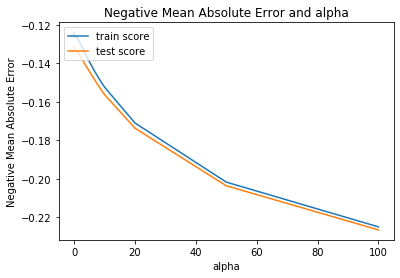

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
# list of alphas to tune
params = {'alpha': [10.0, 20, 50]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None, param_grid={'alpha': [10.0, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005438,0.001214,0.001687,0.000416,10,{'alpha': 10.0},-0.140603,-0.156795,-0.160746,-0.146675,...,-0.156153,0.012234,1,-0.155953,-0.149180,-0.150295,-0.154972,-0.150888,-0.152258,0.002692
1,0.003982,0.001406,0.001432,0.000536,20,{'alpha': 20},-0.160031,-0.172946,-0.176442,-0.163107,...,-0.173659,0.012628,2,-0.173644,-0.169691,-0.169487,-0.173117,-0.168786,-0.170945,0.002018
2,0.004087,0.000641,0.001203,0.000396,50,{'alpha': 50},-0.193712,-0.203130,-0.201740,-0.193091,...,-0.203619,0.012121,3,-0.204023,-0.201612,-0.201404,-0.203529,-0.197985,-0.201711,0.002128


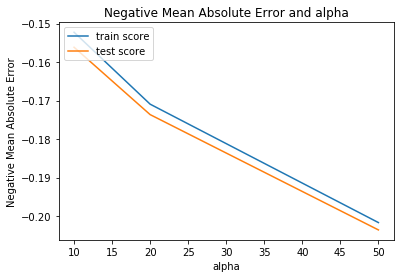

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004969,0.001558,0.002232,0.001012,0.0001,{'alpha': 0.0001},-0.122896,-0.138394,-0.140292,-0.121384,...,-0.131958,0.008112,1,-0.128680,-0.116283,-0.120687,-0.128461,-0.124670,-0.123756,0.004743
1,0.003572,0.000491,0.000990,0.000630,0.001,{'alpha': 0.001},-0.122896,-0.138393,-0.140291,-0.121386,...,-0.131958,0.008111,2,-0.128681,-0.116285,-0.120688,-0.128462,-0.124672,-0.123758,0.004743
2,0.002351,0.000444,0.001357,0.000449,0.01,{'alpha': 0.01},-0.122898,-0.138391,-0.140288,-0.121407,...,-0.131962,0.008104,3,-0.128698,-0.116301,-0.120701,-0.128480,-0.124696,-0.123775,0.004744
3,0.002931,0.000643,0.001012,0.000019,0.05,{'alpha': 0.05},-0.122909,-0.138377,-0.140275,-0.121500,...,-0.131983,0.008076,4,-0.128776,-0.116382,-0.120760,-0.128558,-0.124805,-0.123856,0.004747
4,0.015208,0.024042,0.001492,0.000438,0.1,{'alpha': 0.1},-0.122926,-0.138357,-0.140267,-0.121609,...,-0.132019,0.008049,5,-0.128881,-0.116488,-0.120840,-0.128663,-0.124940,-0.123962,0.004751


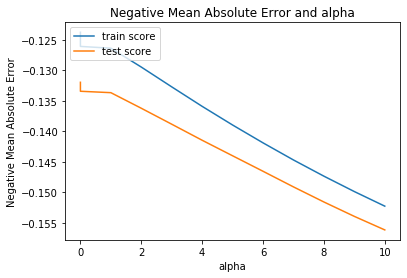

In [73]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003471,0.001008,0.001749,0.000673,0.0001,{'alpha': 0.0001},-0.122896,-0.138394,-0.140292,-0.121384,...,-0.131958,0.008112,1,-0.128680,-0.116283,-0.120687,-0.128461,-0.124670,-0.123756,0.004743
1,0.003508,0.000799,0.001032,0.000633,0.001,{'alpha': 0.001},-0.122896,-0.138393,-0.140291,-0.121386,...,-0.131958,0.008111,2,-0.128681,-0.116285,-0.120688,-0.128462,-0.124672,-0.123758,0.004743
2,0.003350,0.000456,0.001198,0.000398,0.01,{'alpha': 0.01},-0.122898,-0.138391,-0.140288,-0.121407,...,-0.131962,0.008104,3,-0.128698,-0.116301,-0.120701,-0.128480,-0.124696,-0.123775,0.004744
3,0.003131,0.000688,0.001205,0.000395,0.05,{'alpha': 0.05},-0.122909,-0.138377,-0.140275,-0.121500,...,-0.131983,0.008076,4,-0.128776,-0.116382,-0.120760,-0.128558,-0.124805,-0.123856,0.004747
4,0.002338,0.000426,0.000900,0.000312,0.1,{'alpha': 0.1},-0.122926,-0.138357,-0.140267,-0.121609,...,-0.132019,0.008049,5,-0.128881,-0.116488,-0.120840,-0.128663,-0.124940,-0.123962,0.004751


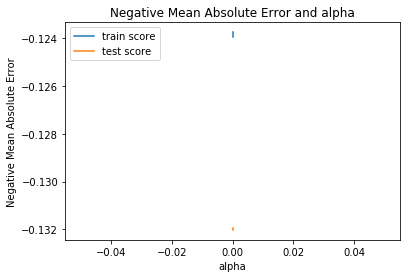

In [76]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [122]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.71886576e-04, -3.89392899e-04,  2.40514156e-01,  6.56467171e-02,
        4.55779563e-02,  7.48750624e-06, -3.06148399e-02, -1.23351745e-02,
       -1.25106530e-02,  5.03483780e-02,  2.78493394e-02,  5.08142253e-02,
        7.26543702e-02, -7.36597508e-03,  2.91888647e-01,  1.84963677e-01,
        1.56553447e-02,  3.17250471e-01,  6.07131772e-02,  4.62028235e-02,
        3.40854855e-02,  1.36659171e-02, -1.86307800e-02,  1.67849166e-02,
        3.46216460e-02,  5.35649168e-02,  8.03854665e-02,  8.93910948e-02,
       -1.68199155e-02,  5.55070609e-02, -3.17950655e-04, -1.01738951e-03,
        4.16764238e-02, -9.20299041e-02,  7.56455925e-03,  4.29231273e-02,
       -6.27979029e-02, -6.78740803e-02,  2.43618845e-03, -7.06108580e-02,
       -1.16004868e-01,  1.04305096e-02,  1.12168378e-01,  1.16904090e-02,
        1.64695159e-01, -7.22480541e-02,  1.80855975e-02, -1.35314491e-01,
       -1.72255178e-01, -1.52268057e-02, -3.81339135e-03, -4.13100510e-02,
       -2.80987173e-02,  

In [123]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
#ridge_df.sort_values('Coefficient',ascending = 'False')
final_df = ridge_df.sort_values(by=['Coefficient'], ascending=False)

In [124]:
final_df

,Features,Coefficient
17,GrLivArea,0.3173
14,1stFlrSF,0.2919
2,LotArea,0.2405
15,2ndFlrSF,0.1850
44,Crawfor,0.1647
54,NridgHt,0.1579
60,StoneBr,0.1399
53,NoRidge,0.1276
72,BrkFace,0.1261
59,Somerst,0.1137


In [78]:
#LASSO REGRESSION

In [125]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [126]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007367,0.001489,0.001603,4.944328e-04,0.0001,{'alpha': 0.0001},-0.122939,-0.137985,-0.140415,-0.121849,...,-0.132029,0.007961,1,-0.128973,-0.116504,-0.120819,-0.128783,-0.125131,-0.124042,0.004800
1,0.003989,0.001092,0.001398,4.908021e-04,0.001,{'alpha': 0.001},-0.123307,-0.136467,-0.142324,-0.126635,...,-0.134366,0.008090,2,-0.133525,-0.120766,-0.124330,-0.132481,-0.128846,-0.127990,0.004840
2,0.002792,0.000399,0.001215,4.337105e-04,0.01,{'alpha': 0.01},-0.179213,-0.188719,-0.182469,-0.182161,...,-0.188849,0.011846,3,-0.187887,-0.184268,-0.184494,-0.186307,-0.187729,-0.186137,0.001537
3,0.002985,0.000630,0.001397,4.877830e-04,0.05,{'alpha': 0.05},-0.296051,-0.296437,-0.287034,-0.277709,...,-0.292390,0.009221,4,-0.291293,-0.291847,-0.294347,-0.292780,-0.287440,-0.291541,0.002297
4,0.002793,0.000747,0.000998,4.523674e-07,0.1,{'alpha': 0.1},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310649,0.008865,5,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922


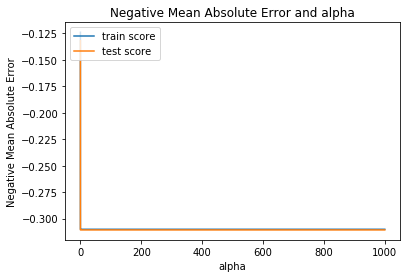

In [127]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [128]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [129]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006382,0.000489,0.001596,4.885782e-04,0.0001,{'alpha': 0.0001},-0.122939,-0.137985,-0.140415,-0.121849,...,-0.132029,0.007961,1,-0.128973,-0.116504,-0.120819,-0.128783,-0.125131,-0.124042,0.004800
1,0.003594,0.000801,0.001393,7.972310e-04,0.001,{'alpha': 0.001},-0.123307,-0.136467,-0.142324,-0.126635,...,-0.134366,0.008090,2,-0.133525,-0.120766,-0.124330,-0.132481,-0.128846,-0.127990,0.004840
2,0.002588,0.000804,0.001196,3.989992e-04,0.01,{'alpha': 0.01},-0.179213,-0.188719,-0.182469,-0.182161,...,-0.188849,0.011846,3,-0.187887,-0.184268,-0.184494,-0.186307,-0.187729,-0.186137,0.001537
3,0.002791,0.000765,0.000806,4.038339e-04,0.05,{'alpha': 0.05},-0.296051,-0.296437,-0.287034,-0.277709,...,-0.292390,0.009221,4,-0.291293,-0.291847,-0.294347,-0.292780,-0.287440,-0.291541,0.002297
4,0.002394,0.000489,0.000997,4.156970e-07,0.1,{'alpha': 0.1},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310649,0.008865,5,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922


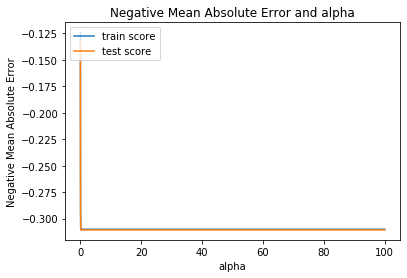

In [130]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [155]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [156]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005391,0.000803,0.001590,0.000495,0.0001,{'alpha': 0.0001},-0.122939,-0.137985,-0.140415,-0.121849,...,-0.132029,0.007961,1,-0.128973,-0.116504,-0.120819,-0.128783,-0.125131,-0.124042,0.004800
1,0.004394,0.001365,0.001389,0.000480,0.001,{'alpha': 0.001},-0.123307,-0.136467,-0.142324,-0.126635,...,-0.134366,0.008090,2,-0.133525,-0.120766,-0.124330,-0.132481,-0.128846,-0.127990,0.004840
2,0.002593,0.000488,0.001004,0.000642,0.01,{'alpha': 0.01},-0.179213,-0.188719,-0.182469,-0.182161,...,-0.188849,0.011846,3,-0.187887,-0.184268,-0.184494,-0.186307,-0.187729,-0.186137,0.001537
3,0.002004,0.000622,0.001395,0.000798,0.05,{'alpha': 0.05},-0.296051,-0.296437,-0.287034,-0.277709,...,-0.292390,0.009221,4,-0.291293,-0.291847,-0.294347,-0.292780,-0.287440,-0.291541,0.002297
4,0.002791,0.000398,0.001390,0.000480,0.1,{'alpha': 0.1},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310649,0.008865,5,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922


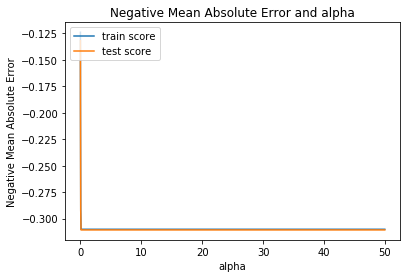

In [157]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [158]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [159]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007381,0.000795,0.001794,0.000398,0.0001,{'alpha': 0.0001},-0.122939,-0.137985,-0.140415,-0.121849,...,-0.132029,0.007961,1,-0.128973,-0.116504,-0.120819,-0.128783,-0.125131,-0.124042,0.004800
1,0.003802,0.000671,0.001500,0.000454,0.001,{'alpha': 0.001},-0.123307,-0.136467,-0.142324,-0.126635,...,-0.134366,0.008090,2,-0.133525,-0.120766,-0.124330,-0.132481,-0.128846,-0.127990,0.004840
2,0.004232,0.000973,0.001345,0.000695,0.01,{'alpha': 0.01},-0.179213,-0.188719,-0.182469,-0.182161,...,-0.188849,0.011846,3,-0.187887,-0.184268,-0.184494,-0.186307,-0.187729,-0.186137,0.001537
3,0.035704,0.065928,0.001204,0.000395,0.05,{'alpha': 0.05},-0.296051,-0.296437,-0.287034,-0.277709,...,-0.292390,0.009221,4,-0.291293,-0.291847,-0.294347,-0.292780,-0.287440,-0.291541,0.002297
4,0.004787,0.001164,0.001997,0.000895,0.1,{'alpha': 0.1},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310649,0.008865,5,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922


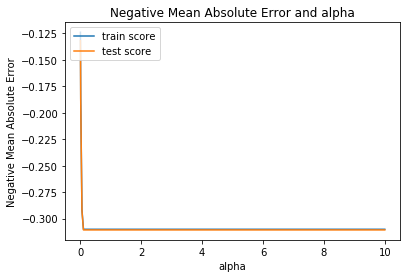

In [160]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [161]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [162]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006184,0.001467,0.001595,0.000488,0.0001,{'alpha': 0.0001},-0.122939,-0.137985,-0.140415,-0.121849,...,-0.132029,0.007961,1,-0.128973,-0.116504,-0.120819,-0.128783,-0.125131,-0.124042,0.004800
1,0.003993,0.000638,0.001393,0.000483,0.001,{'alpha': 0.001},-0.123307,-0.136467,-0.142324,-0.126635,...,-0.134366,0.008090,2,-0.133525,-0.120766,-0.124330,-0.132481,-0.128846,-0.127990,0.004840
2,0.004175,0.001467,0.000804,0.000402,0.01,{'alpha': 0.01},-0.179213,-0.188719,-0.182469,-0.182161,...,-0.188849,0.011846,3,-0.187887,-0.184268,-0.184494,-0.186307,-0.187729,-0.186137,0.001537
3,0.003389,0.000798,0.001000,0.000007,0.05,{'alpha': 0.05},-0.296051,-0.296437,-0.287034,-0.277709,...,-0.292390,0.009221,4,-0.291293,-0.291847,-0.294347,-0.292780,-0.287440,-0.291541,0.002297
4,0.002792,0.000746,0.001596,0.000489,0.1,{'alpha': 0.1},-0.313295,-0.313484,-0.305876,-0.296961,...,-0.310649,0.008865,5,-0.309932,-0.308826,-0.311153,-0.312981,-0.307375,-0.310053,0.001922


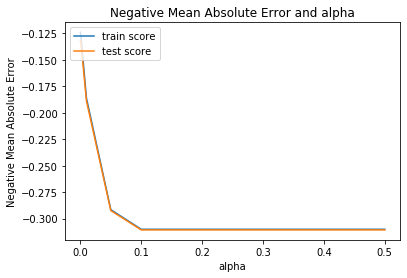

In [163]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [173]:
alpha =0.1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
lasso.coef_

array([-0.00047442,  0.00240103,  0.        ,  0.08526573,  0.        ,
        0.00027283, -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.03025149,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.00463243,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.  

In [175]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
final_df2 = lasso_df.sort_values(by=['Coefficient'], ascending=False)

In [176]:
final_df2

,Features,Coefficient
3,OverallQual,0.0853
23,TotRmsAbvGrd,0.0303
1,LotFrontage,0.0024
5,MasVnrArea,0.0003
58,SawyerW,-0.0000
81,VinylSd,0.0000
77,MetalSd,-0.0000
78,Plywood,0.0000
79,Stone,0.0000
80,Stucco,0.0000


In [ ]:
#Top 5 most important predictors from the lasso regression model would be
#1.OverallQual
#2.TotRmsAbvGrd
#3.LotFrontage
#4.MasVnrArea
#5.SawyerW

#Top 5 most important predictors from the ridge regression model would be
#1.GrLivArea
#2.1stFlrSF
#3.LotArea
#4.2ndFlrSF
#5.Crawfor

In [179]:
#Question 3 
#Removing the top 5 features and rebuilding the model
X_train = X_train.drop(['OverallQual','TotRmsAbvGrd','LotFrontage','MasVnrArea','SawyerW'],axis=1)

In [180]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [181]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040292,0.010104,0.001596,0.000489,0.0001,{'alpha': 0.0001},-0.097824,-0.104844,-0.110495,-0.098991,...,-0.103429,0.004596,2,-0.092273,-0.081710,-0.085187,-0.092581,-0.090621,-0.088475,0.004300
1,0.009574,0.002933,0.001397,0.000489,0.001,{'alpha': 0.001},-0.097168,-0.102380,-0.107450,-0.100798,...,-0.102749,0.003680,1,-0.098080,-0.091010,-0.091928,-0.096937,-0.096659,-0.094923,0.002875
2,0.005187,0.000977,0.001196,0.000398,0.01,{'alpha': 0.01},-0.134584,-0.145814,-0.136098,-0.135609,...,-0.137422,0.004224,3,-0.134896,-0.132981,-0.134418,-0.133513,-0.132879,-0.133738,0.000796
3,0.003790,0.000399,0.001197,0.000399,0.05,{'alpha': 0.05},-0.169089,-0.178942,-0.177921,-0.165317,...,-0.175075,0.006873,4,-0.171815,-0.171210,-0.173291,-0.170276,-0.171825,-0.171683,0.000982
4,0.003590,0.000798,0.001397,0.000488,0.1,{'alpha': 0.1},-0.227300,-0.230218,-0.234034,-0.213960,...,-0.230944,0.011362,5,-0.228922,-0.228657,-0.229316,-0.229153,-0.228007,-0.228811,0.000459


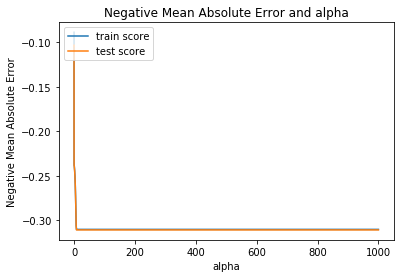

In [182]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [183]:
alpha =0.1

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [184]:
lasso.coef_

array([-0.00071133,  0.        ,  0.        , -0.00326013, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.01547646,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.00122244,  0.00385572,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00727895,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.  

In [185]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
final_df3 = lasso_df.sort_values(by=['Coefficient'], ascending=False)

In [186]:
final_df3

,Features,Coefficient
21,GarageCars,0.0039
20,Fireplaces,0.0012
56,Timber,0.0000
72,MetalSd,-0.0000
82,CBlock,-0.0000
81,BrkFace,0.0000
80,Brk Cmn,-0.0000
79,AsphShn,-0.0000
78,WdShing,-0.0000
77,Wd Sdng,0.0000
